In [126]:
print("Tree Me!")

Tree Me!


In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Decision Tree Pre Pruning

In [128]:
from sklearn.datasets import load_iris

In [129]:
iris = load_iris()

In [130]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [131]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [132]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [133]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [134]:
pd.DataFrame(iris['data'])

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [135]:
df  = pd.DataFrame(iris['data'])

In [136]:
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [137]:
df.columns=['sepal length','sepal width','petal lenght','petal width']

In [138]:
df

,sepal length,sepal width,petal lenght,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [139]:
x = df

In [140]:
# x is independent feature 

In [141]:
y = iris['target']
# y is my target/dependent faeture 

In [142]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [143]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
model = DecisionTreeClassifier()

In [146]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.38461538461538464, 0.5, 'x[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[2] <= 5.05\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]

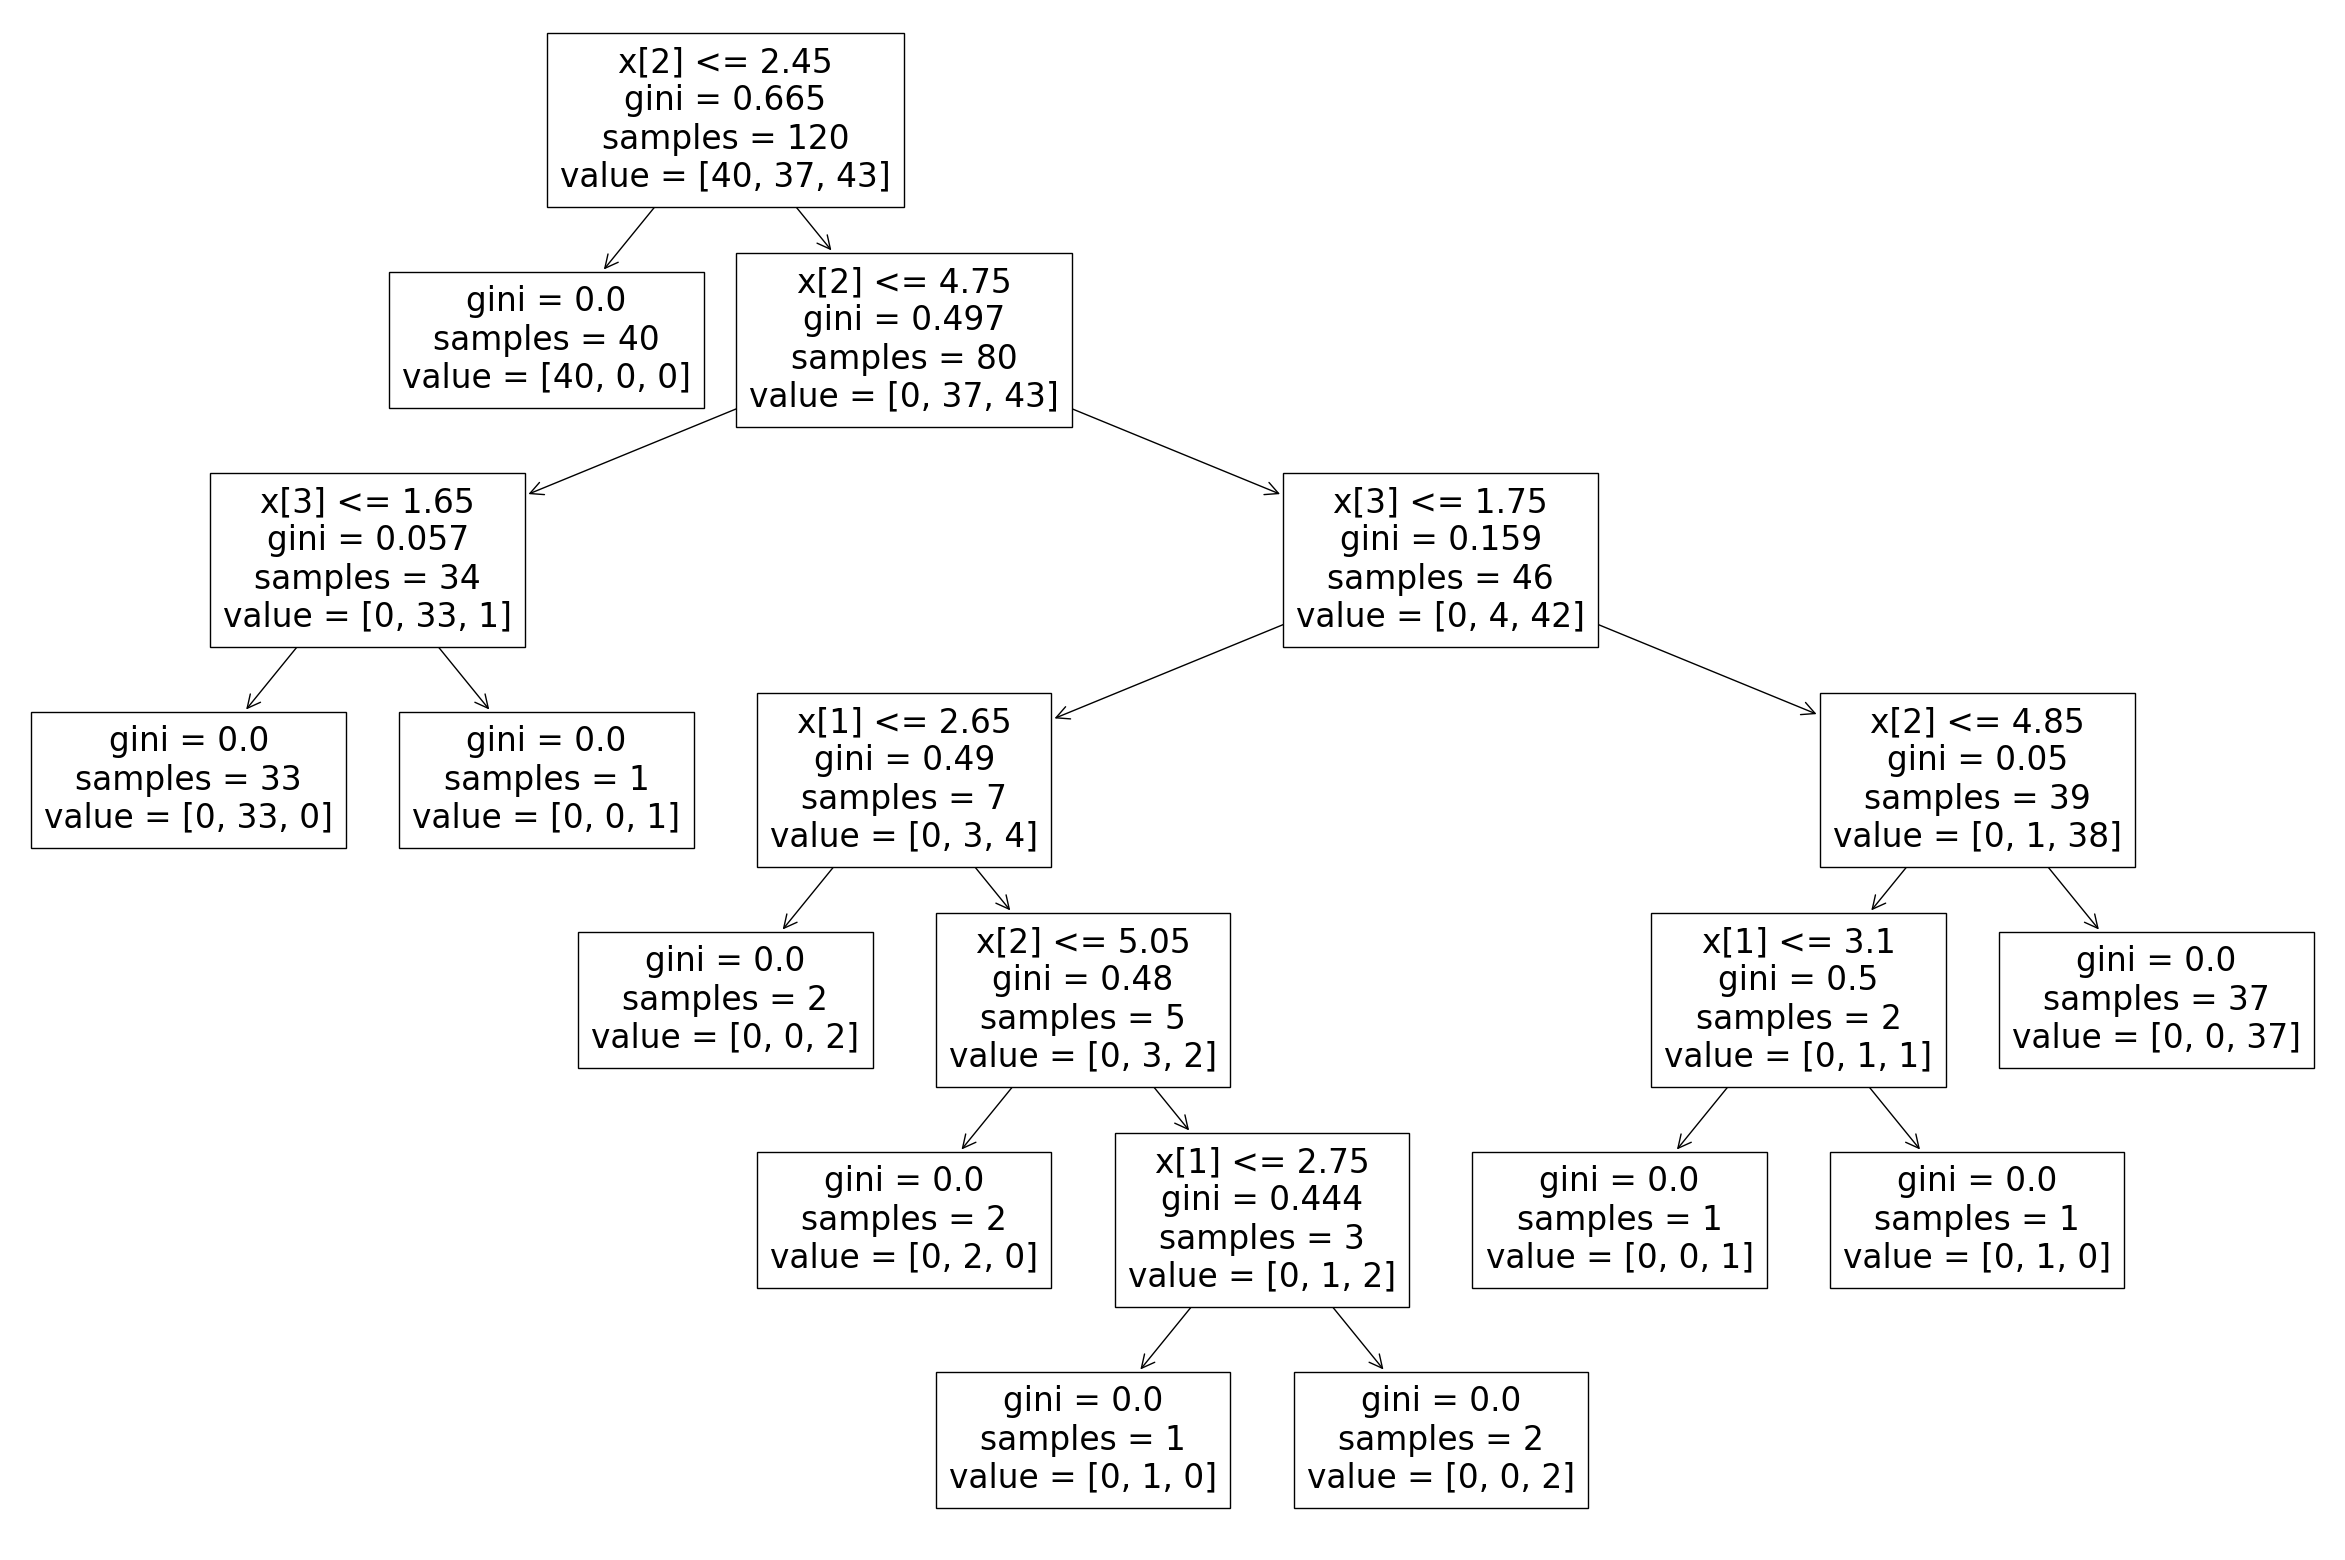

In [147]:
from sklearn import tree
plt.figure(figsize=(30,20))
tree.plot_tree(model,filled=False)

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.38461538461538464, 0.5, 'x[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[2] <= 5.05\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]

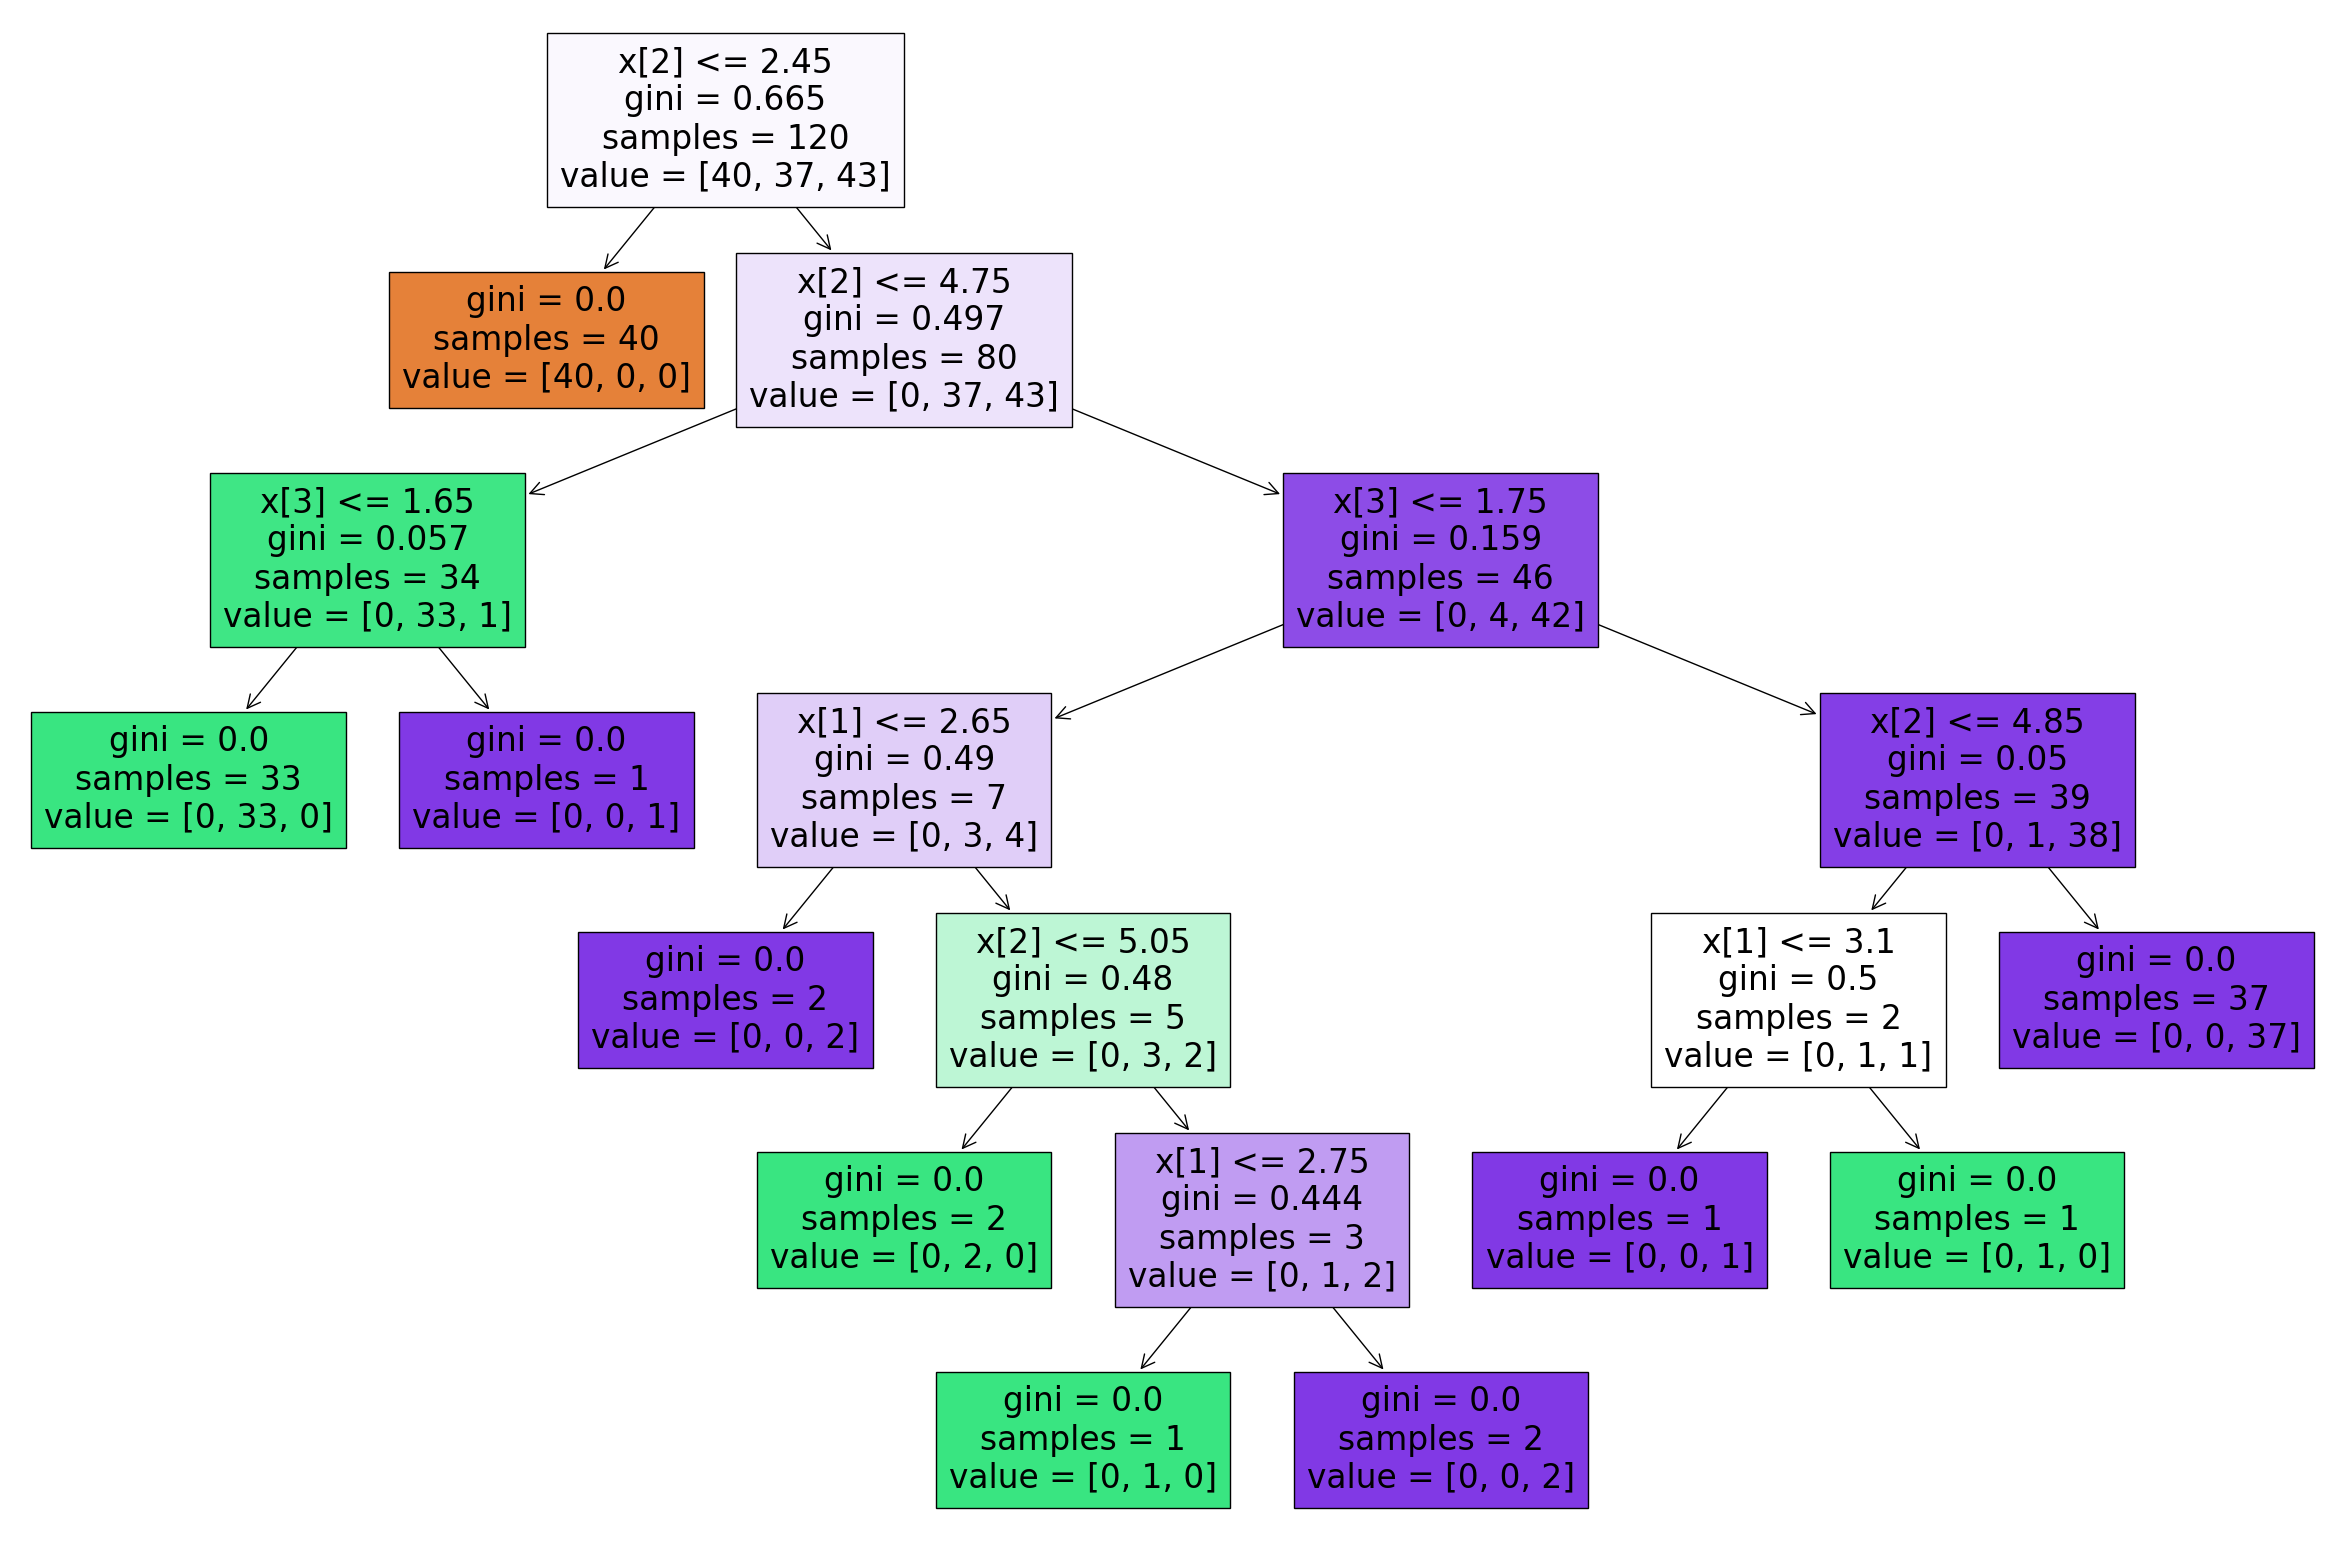

In [148]:

plt.figure(figsize=(30,20))
tree.plot_tree(model,filled=True)

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.38461538461538464, 0.5, 'x[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[2] <= 5.05\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]

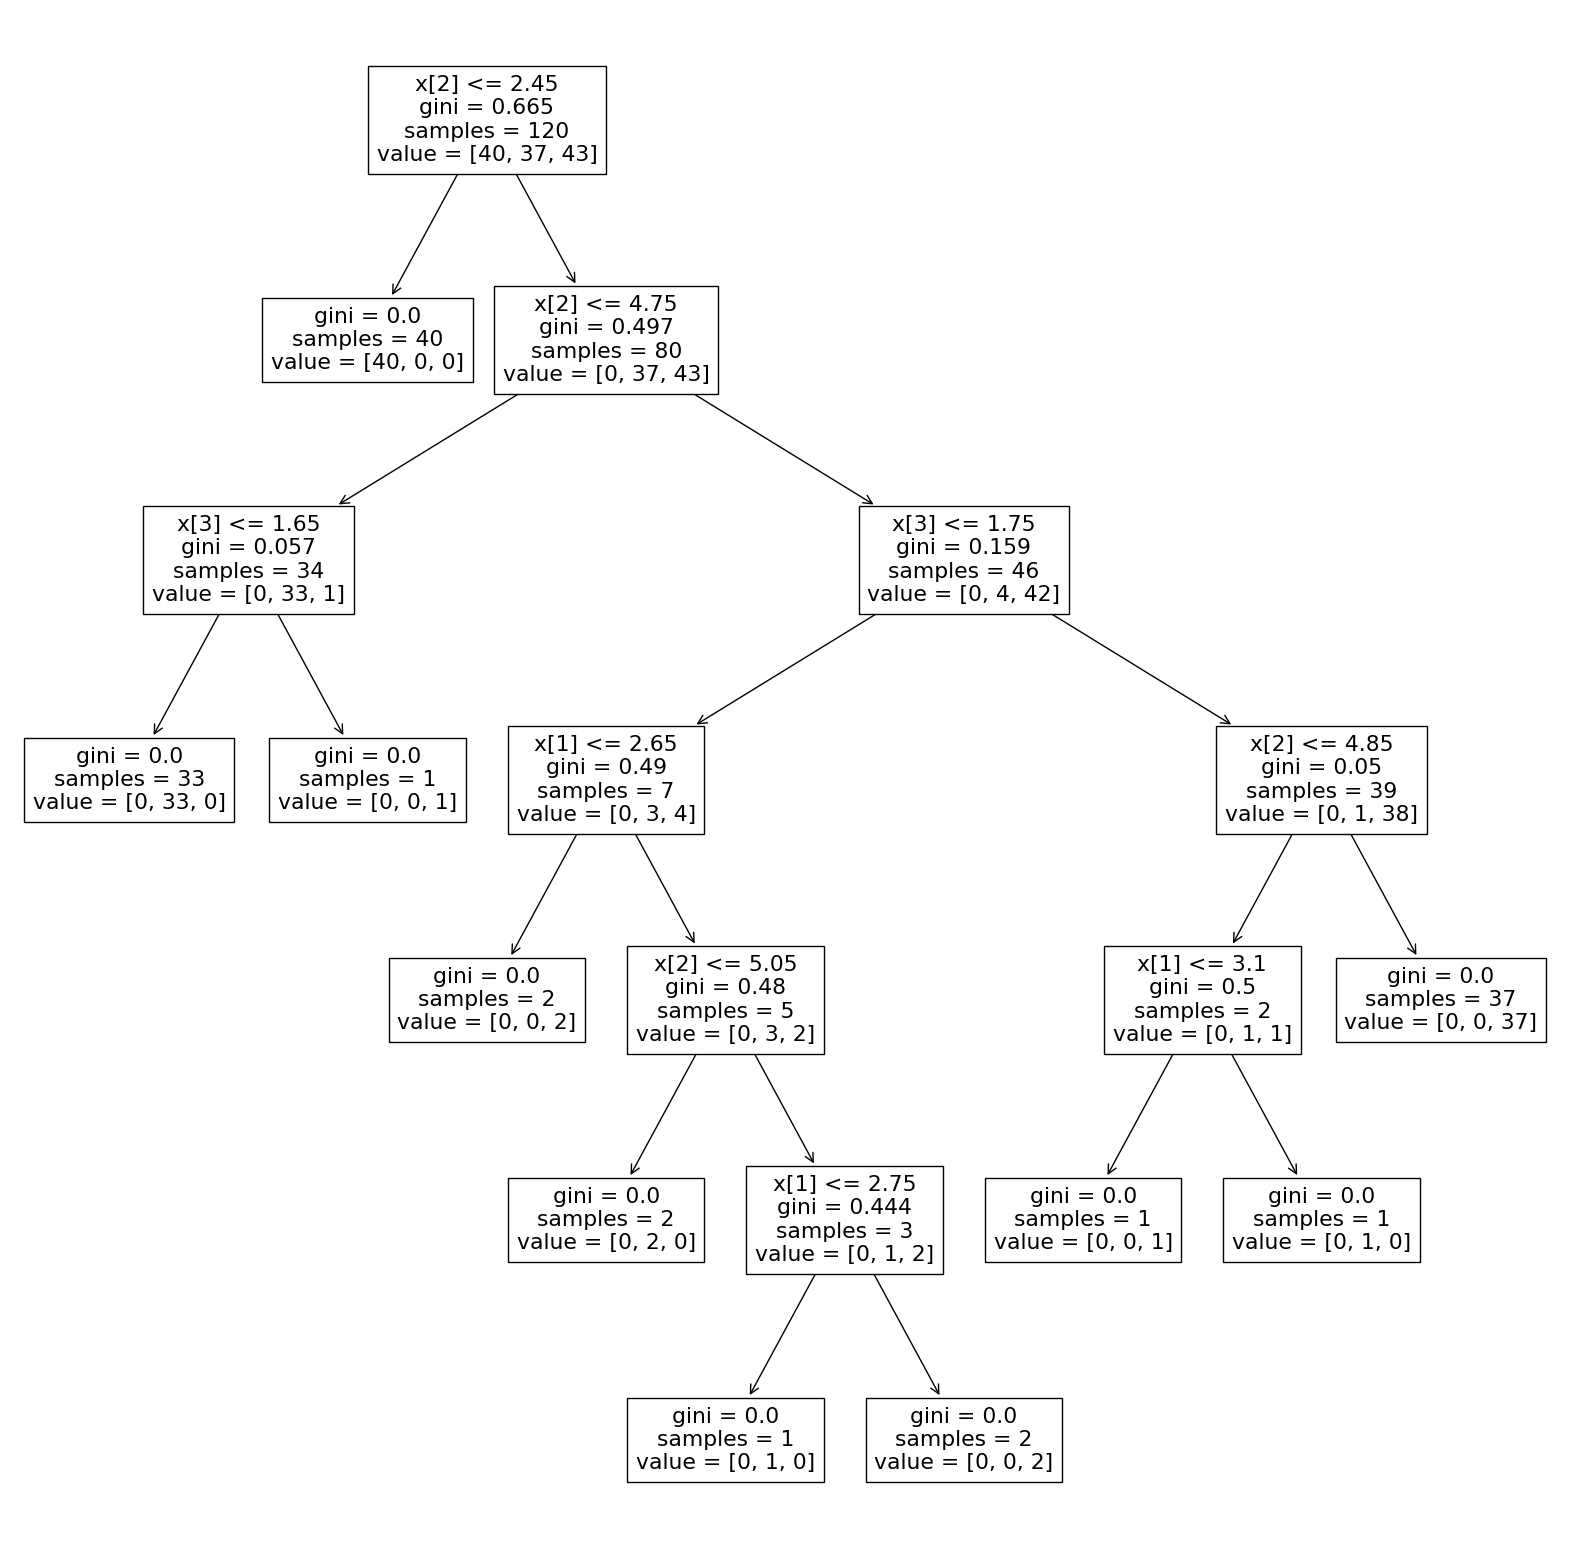

In [149]:
# from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(model,filled=False)

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
model = DecisionTreeClassifier()

In [152]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [153]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [154]:
x_test

,sepal length,sepal width,petal lenght,petal width
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2
60,5.0,2.0,3.5,1.0
72,6.3,2.5,4.9,1.5
67,5.8,2.7,4.1,1.0
39,5.1,3.4,1.5,0.2
55,5.7,2.8,4.5,1.3


In [155]:
y_test

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

In [156]:
x_train

,sepal length,sepal width,petal lenght,petal width
58,6.6,2.9,4.6,1.3
97,6.2,2.9,4.3,1.3
129,7.2,3.0,5.8,1.6
114,5.8,2.8,5.1,2.4
146,6.3,2.5,5.0,1.9
...,...,...,...,...
113,5.7,2.5,5.0,2.0
64,5.6,2.9,3.6,1.3
15,5.7,4.4,1.5,0.4
125,7.2,3.2,6.0,1.8


In [157]:
y_train

array([1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

In [158]:
model = DecisionTreeClassifier(max_depth=2)

In [159]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [160]:
DecisionTree = DecisionTreeClassifier(max_depth=2)

In [161]:
DecisionTree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [162]:
from sklearn import tree

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.159\nsamples = 46\nvalue = [0, 4, 42]')]

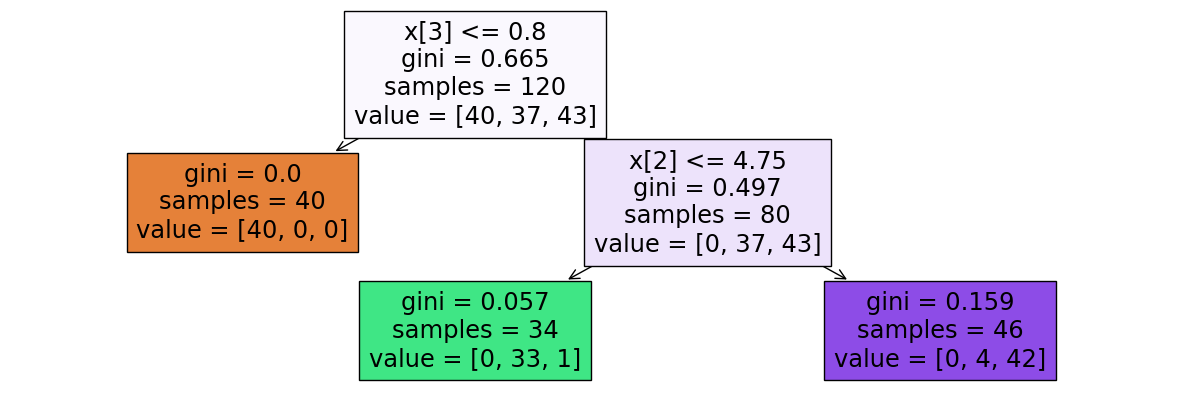

In [163]:
plt.figure(figsize=(15,5))
tree.plot_tree(model,filled=True)

In [164]:
y_predict = DecisionTree.predict(x_train)

In [165]:
y_predict

array([1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

In [166]:
y_train

array([1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

In [167]:
from sklearn.metrics import classification_report,confusion_matrix

In [168]:
cm = confusion_matrix(y_train,y_predict)

In [169]:
cm

array([[40,  0,  0],
       [ 0, 33,  4],
       [ 0,  1, 42]], dtype=int64)

In [170]:
cr = classification_report(y_train,y_predict)

In [171]:
cr

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        40\n           1       0.97      0.89      0.93        37\n           2       0.91      0.98      0.94        43\n\n    accuracy                           0.96       120\n   macro avg       0.96      0.96      0.96       120\nweighted avg       0.96      0.96      0.96       120\n'

In [172]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.89      0.93        37
           2       0.91      0.98      0.94        43

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [173]:
y_test_pred = DecisionTree.predict(x_test)

In [174]:
y_test_pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 2, 2])

In [175]:
cm = confusion_matrix(y_test_pred,y_test)

In [176]:
print(cm)

[[10  0  0]
 [ 0 11  0]
 [ 0  2  7]]


In [177]:
cr = classification_report(y_test_pred,y_test)

In [178]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.85      1.00      0.92        11
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [179]:
# Decision Tree Pre Pruning

# Decision Tree Pre Pruning

In [180]:
print("Pre Pruning")

Pre Pruning


In [181]:
parameters ={
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5],
    'max_feature' : ['auto','sqrt','log2']
} 

In [182]:
parameters

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_feature': ['auto', 'sqrt', 'log2']}

In [183]:
from sklearn.model_selection import GridSearchCV